<a href="https://colab.research.google.com/github/ColstonBod-oy/CCS7-TensorFlowDemos/blob/main/models/clustering/CCS7_Clustering_Model_Demo_(K_Means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using TensorFlow to solve a Clustering Problem (K-Means)**

This is the first clustering activity looks at how Clustering Models are used to group a set of unsupervised data into different clusters using the K-Means method. We will be looking at two smaller sets of code to showcase how clustering is done and how it is used to cluster a dataset based on the features of the given data. We will be looking at how clustering is accomplished with the use of the K-Means and E-M methods.

**Each of the guide questions must be answered in 100 to 200 words each.**

**Make sure to click "File" and then "Save a Copy in Drive" before making any changes to the demo.**

# **Clustering using K-Means**

Here, we will look at clustering a given set of data using the K-Means algorithm. We start by importing the required libaries needed for our given code.

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import io

We then import the file that we will be using for our demo code. This is a set of data that is unlabaled and will be used for clustering.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving clustering.csv to clustering.csv


Once we have uploaded our data, we will then check some of the entries to make sure it was correctly imported. In this case, we will display the first five entries. Take note, that similar to regression, we will be making use of two variables to help us plot our data. This is because more variables are used, the more difficult to visualize and plot the data onto a graph.
*   **Guide Question 1:** What are other similarities in the machine learning process that clustering has with regression and classification?
*   **Guide Question 2:** Do they have other similar steps or processes such as data augmentation? Kindly elaborate on these similarities.

In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['clustering.csv']))
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In our example, we will be making use of only two variables from the given data - "LoanAmount" and "ApplicantIncome". This will also allow us to visualize the steps in clustering. We can then visualize these data points into a plot graph.
*   **Guide Question 3:** What are the effects or changes on a clustering model as we add more features or variables for our given data?

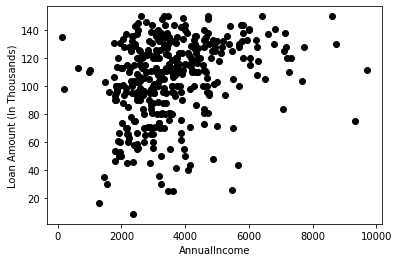

In [ ]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In this set of code, we then choose the number of clusters we would like to have for our data which will be assigned to the clusters variable (k). We will then select a random centroid for each cluster.
*   **Guide Question 4:** What is considered an **"optimal"** number of clusters? What will happen to the model and the clustering result if the number of clusters is set too high or too low?
*   **Guide Question 5:** What is the **centroid**? Why is it used as part of our clustering model? What is it use to forming the clusters for our model?

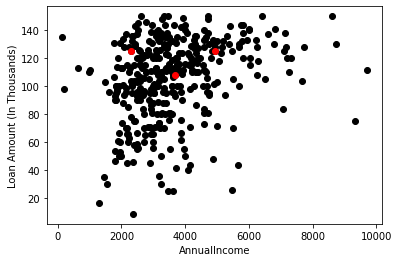

In [ ]:
# The number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

The red dots in the graph above represent the 3 centroids for each cluster. These centroids are randomly chosen so you will get different results when you run the code. The code below will assign the different data to the closest cluster centroid. After which it will recompute the centroids of newly formed clusters.
*   **Guide Question 6**: Why are the **centroids** randomly chosen? Why do we recompute the centroids for our given clusters?

In [ ]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


162.97993158549724
215.3729088786376
331.2599897672009
217.53038739281533
239.7512139777225
125.16501318300665
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


The code below allows use to visualize the "final" clusters of our given dataset. Same as before, the red dots represent the centroid of each cluster. Each cluster has also been color coded, allowing us to identify which cluster is which.
*   **Guide Question 7:** What happens if you rerun the code a few more times? Do you get a different result with your final cluster? Why do you think it does or does not change?
*   **Guide Question 8:** Try changing the variables that are used for clustering, do you get different results? How would you compare the results now with the results or another set of variables?

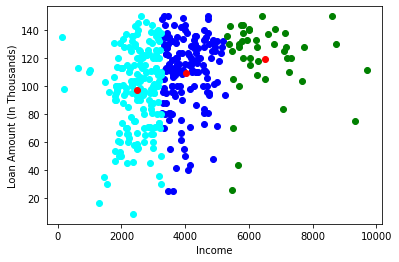

In [ ]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()